In [1]:
#importing necessary libraries, just run this part

import numpy as np
import matplotlib.pyplot as plt
from peakBasedFunctions import voigtNUniPeak
from stackingFunctions import widthNormLinStacker
from edibles.utils.functions import vac2air_ciddor
import os.path

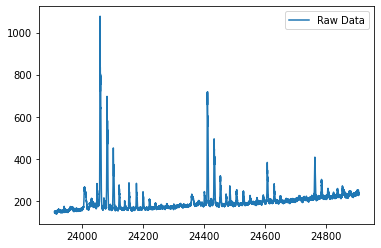

In [2]:
#loading raw data, change the file name for respective molecule and run this part

#put address for file
dataRaw = np.loadtxt('C:/Users/hkhan/edibles/edibles/data/Labdata/CRDS/PERYLENE.DAT', skiprows = 1)
plt.plot(dataRaw[:, 0], dataRaw[:, 1], label = 'Raw Data')
plt.legend()

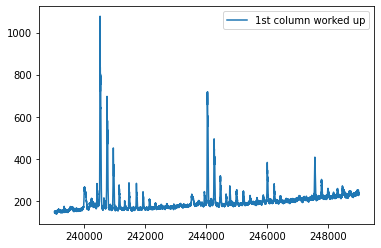

In [3]:
#workup of 1st column of data, change the option and run this part

%matplotlib notebook

#If in first column of file - wavelength is given in nm set option = 0
#                           - wavelength is given in angstrom set option = 1
#                           - wave number if given in 1/cm set option = 2
option = 0

data = np.zeros(dataRaw.shape)

if option == 0:
    data[:, 0] = vac2air_ciddor(dataRaw[:, 0]*10.0)
elif option == 1:
    data[:, 0] = vac2air_ciddor(dataRaw[:, 0])
elif option == 2:
    data[:, 0] = vac2air_ciddor((1/dataRaw[:, 0])*1e8)
    
data[:, 1] = dataRaw[:, 1]
    
plt.plot(data[:, 0], data[:, 1], label = '1st column worked up')
plt.legend()

In [14]:
#input flat range here and then run this part

%matplotlib inline

flatRange = [3120, 3150]

<IPython.core.display.Javascript object>


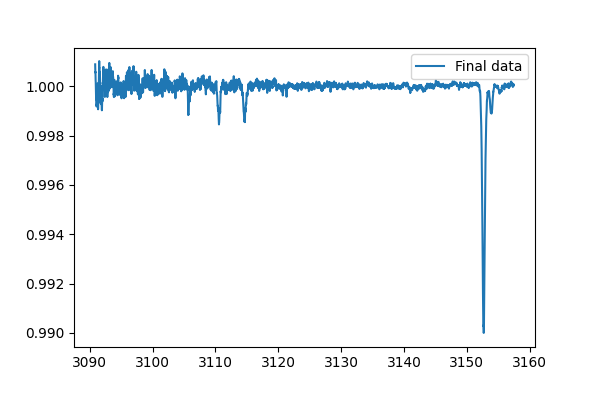

In [28]:
#workup of 2nd column of data, just run this part
#donot run it twice in sequence!!! (run from loading of raw data if you want to run this part again)

%matplotlib notebook

data[:, 1] = 1 - 0.01*(dataRaw[:, 1] - np.mean(dataRaw[np.logical_and(data[:, 0] >= flatRange[0], data[:, 0] <= flatRange[1]), 1]))/(np.max(dataRaw[:, 1]) - np.mean(dataRaw[np.logical_and(data[:, 0] >= flatRange[0], data[:, 0] <= flatRange[1]), 1]))
plt.plot(data[:, 0], data[:, 1], label = 'Final data')
plt.legend()

In [29]:
#input rough peak ranges (min, max) here from interacting with above graph and then run this part

peakRanges = np.array([[3104, 3107],
                       [3108, 3111],
                       [3113, 3116],
                       [3151, 3153.4],
                       [3153.4, 3154.3]])

In [30]:
#calculation of sd here, just run this part

%matplotlib inline

sd = np.std(data[np.logical_and(data[:, 0] >= flatRange[0], data[:, 0] <= flatRange[1]), 1])
print(sd)

7.983989016562362e-05


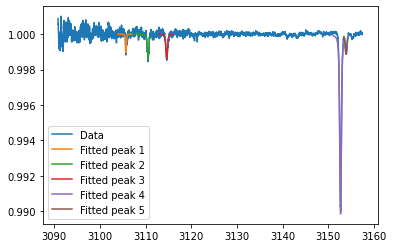

In [24]:
#fitting part, just run this part

plt.plot(data[:, 0], data[:, 1], label = 'Data')
rawParams = voigtNUniPeak(data, peakRanges, sd)
plt.legend()
print(rawParams)

In [33]:
#load raw parameters into array passable in stacker, change the file name according to molecule and run this part

params = np.zeros((peakRanges.shape[0], 2))

for it1 in range(peakRanges.shape[0]):
    lab1 = 'Centre' + str(it1+1)
    lab2 = 'FWHM' + str(it1+1)
    params[it1, 0] = rawParams[lab1]
    params[it1, 1] = rawParams[lab2]

print(params)

#change fileName here according to molecule
fileName = '2MethylNaphthaleneParams.txt'

if not os.path.exists(fileName):
    np.savetxt(fileName, params)

[[3.10571179e+03 1.95189001e-01]
 [3.11056071e+03 3.80693303e-01]
 [3.11463900e+03 4.19188068e-01]
 [3.15268290e+03 4.11427769e-01]
 [3.15389382e+03 4.48491579e-01]]


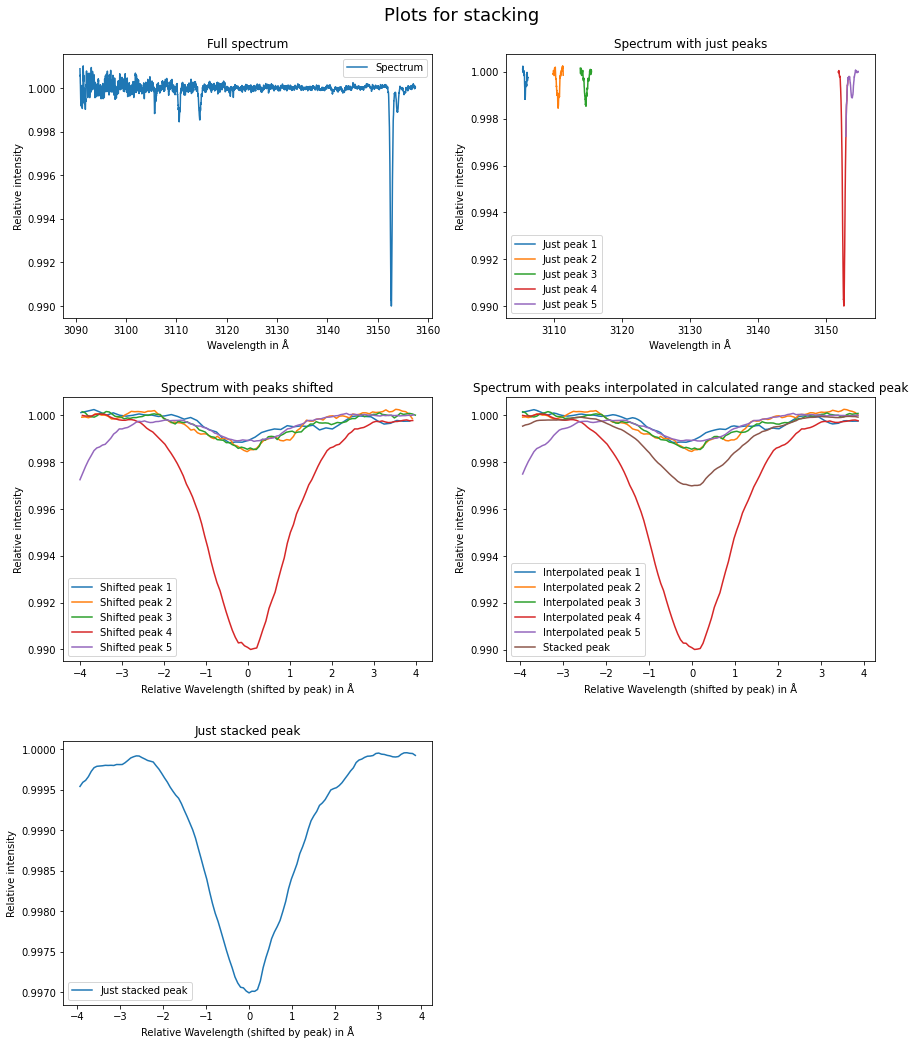

In [27]:
#stacking for checking, just run this part

stackedData = widthNormLinStacker(data, params)